## Let's first plot arrondisements of Paris

In [2]:
import pandas as pd

In [3]:
df=pd.read_html("https://en.wikipedia.org/wiki/Arrondissements_of_Paris")[2]
df.head()

Arrondissement (R for Right Bank, L for Left Bank)            Name  \
0                                         1st (Ie) R          Louvre   
1                                        2nd (IIe) R          Bourse   
2                                       3rd (IIIe) R          Temple   
3                                        4th (IVe) R  Hôtel-de-Ville   
4                                         5th (Ve) L        Panthéon   

                Area (km2)  Population(March 1999 census)  \
0  1.826 km2 (0.705 sq mi)                          16888   
1  0.992 km2 (0.383 sq mi)                          19585   
2  1.171 km2 (0.452 sq mi)                          34248   
3  1.601 km2 (0.618 sq mi)                          30675   
4  2.541 km2 (0.981 sq mi)                          58849   

   Population(July 2005 estimate) Density (2005)(inhabitants per km2)  \
0                           17700                                9693   
1                           20700                               20867   
2                           35100                               29974   
3                           28600                               17864   
4                           60600                               23849   

  Peak of population                       Mayor  
0        before 1861  Jean-François Legaret (LR)  
1        before 1861     Jacques Boutault (EELV)  
2        before 1861       Pierre Aidenbaum (PS)  
3        before 1861             Ariel Weil (PS)  
4               1911      Florence Berthout (LR)

In [4]:
paris_master_data=df[["Arrondissement (R for Right Bank, L for Left Bank)","Name","Area (km2)","Population(July 2005 estimate)"]]

In [5]:
#Renaming the files for ease of handling
paris_master_data=paris_master_data.rename(columns={"Arrondissement (R for Right Bank, L for Left Bank)":"Arrondisement","Population(July 2005 estimate)":"Population"})

In [6]:
#re is text handling libray

import re
paris_master_data["Area (km2)"]= paris_master_data["Area (km2)"].str.split(" ").str[0]
paris_master_data["Arrondisement"]= paris_master_data["Arrondisement"].str.split(" ").str[0]

#paris_master_data["Arrondisement"]= paris_master_data["Arrondisement"]+" Arrondisement"

paris_master_data.head()

Arrondisement            Name Area (km2)  Population
0           1st          Louvre  1.826 km2       17700
1           2nd          Bourse  0.992 km2       20700
2           3rd          Temple  1.171 km2       35100
3           4th  Hôtel-de-Ville  1.601 km2       28600
4           5th        Panthéon  2.541 km2       60600

### Now let's find the geodata for the arrondisement

In [10]:
from geopy.geocoders import Nominatim

for x in range (0,len(paris_master_data)): 
    address = paris_master_data.loc[x,"Name"]+ " Paris"
    geolocator = Nominatim(user_agent="tt_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    paris_master_data.loc[x,"longitude"]=longitude
    paris_master_data.loc[x,"Latitude"]=latitude

Paris=paris_master_data
Paris.head()

Arrondisement            Name Area (km2)  Population  longitude   Latitude
0           1st          Louvre  1.826 km2       17700   2.338028  48.861147
1           2nd          Bourse  0.992 km2       20700   2.343126  48.867684
2           3rd          Temple  1.171 km2       35100   2.358685  48.862683
3           4th  Hôtel-de-Ville  1.601 km2       28600   2.352528  48.856426
4           5th        Panthéon  2.541 km2       60600   2.346079  48.846191

In [11]:
#slightly tweaking the cordinates of two arrondisements based on empirical knowledge

Paris.loc[15,"longitude"]=2.27573
Paris.loc[11,"longitude"]=2.40214
Paris.loc[15,"Latitude"]=48.8652
Paris.loc[11,"Latitude"]=48.8352

### Let's plot these points on a map

In [14]:
#!conda install -c conda-forge folium=0.5.0 --yes

#from sklearn import preprocessing
#min_max_scaler = preprocessing.MinMaxScaler()


import folium
paris_population = folium.Map(location=[48.8566, 2.3522],zoom_start=12.2)


text="tesg"
for lat, lng, name, arr, pop in zip(Paris['Latitude'], Paris['longitude'], Paris["Name"], Paris["Arrondisement"],Paris["Population"] ):
    label = '{}, {}'.format(name, pop)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat, lng],
    radius=pop/7000,
    popup=label,
    color='crimson',
    fill=True,
    fill_color='crimson',
    fill_opacity=0.7,
    parse_html=False).add_to(paris_population)  
    
    folium.Marker(
    [lat, lng],
    icon=folium.DivIcon(
    icon_size=(10,36),
    icon_anchor=(0,0),
    html='<div style="color:#3395FF;font-weight:bold" >%s</div>' % arr,
    )
    ).add_to(paris_population)

paris_population

### Alsp plotting the population density

In [15]:
Paris["Population density"]=Paris["Population"]/Paris["Area (km2)"].str.split("\\s+").str[0].astype(float)

In [16]:
paris_population_density = folium.Map(location=[48.8566, 2.3522],zoom_start=12.2)


for lat, lng, name, arr, pop, pop_density in zip(Paris['Latitude'], Paris['longitude'], Paris["Name"], 
                                                Paris["Arrondisement"],Paris["Population"],Paris["Population density"] ):
    label = '{}, {}'.format(name, pop)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat, lng],
    radius=pop_density/2000,
    popup=label,
    color='crimson',
    fill=True,
    fill_color='crimson',
    fill_opacity=0.7,
    parse_html=False).add_to(paris_population_density)  
    
    folium.Marker(
    [lat, lng],
    icon=folium.DivIcon(
    icon_size=(10,36),
    icon_anchor=(0,0),
    html='<div style="color:#3348FF;font-weight:bold" >%s</div>' % arr,
    )
    ).add_to(paris_population_density)

paris_population_density

### Importing the data from foursquare API

In [17]:
CLIENT_ID = '01LMYPD3MFXSNZ1IUBC1JSBGWIETJNZ24EHJWYXJ0UYTAYOI' 
CLIENT_SECRET = 'RB5UPSPWTI4Q4GU0J2CWJVI5DKFAB1KHJACS4SYWR3MDYLCO' 
VERSION = '20180605' 

LIMIT=400

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 01LMYPD3MFXSNZ1IUBC1JSBGWIETJNZ24EHJWYXJ0UYTAYOI
CLIENT_SECRET:RB5UPSPWTI4Q4GU0J2CWJVI5DKFAB1KHJACS4SYWR3MDYLCO


In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=4500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section=food'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
   
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        #print("results")
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

      
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    
    
    
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    

    return(nearby_venues)

In [19]:
import requests

paris_food = getNearbyVenues(names=Paris['Arrondisement'],
                                   latitudes=Paris['Latitude'],
                                   longitudes=Paris['longitude']
                                  )

In [20]:
paris_food=paris_food.rename(columns={"Neighborhood":"Arrondisement"})
paris_food.head()

Arrondisement  Neighborhood Latitude  Neighborhood Longitude  \
0           1st              48.861147                2.338028   
1           1st              48.861147                2.338028   
2           1st              48.861147                2.338028   
3           1st              48.861147                2.338028   
4           1st              48.861147                2.338028   

              Venue  Venue Latitude  Venue Longitude      Venue Category  
0            LouLou       48.862804         2.333500  Italian Restaurant  
1  Brasserie Réjane       48.865486         2.334824          Restaurant  
2         Ellsworth       48.865528         2.337057   French Restaurant  
3          Sanukiya       48.864713         2.333805     Udon Restaurant  
4        Kunitoraya       48.865973         2.336880     Udon Restaurant

### Plotting the restaurants on the Map

changing the restaurant type to remove duplication for e.g replacing sushi restaurant with japanese restaurant

In [21]:
# replacing the duplicate categories 
paris_food["Venue Category"]=paris_food["Venue Category"].replace("Pizza Place","Italian Restaurant")
paris_food["Venue Category"]=paris_food["Venue Category"].replace("Sushi Restaurant","Japanese Restaurant")
paris_food["Venue Category"]=paris_food["Venue Category"].replace("Asian Restaurant","Kor/Thai/chin/viet")
paris_food["Venue Category"]=paris_food["Venue Category"].replace("Chinese Restaurant","Kor/Thai/chin/viet")
paris_food["Venue Category"]=paris_food["Venue Category"].replace("New American Restaurant","American Restaurant")
paris_food["Venue Category"]=paris_food["Venue Category"].replace("Thai Restaurant","Kor/Thai/chin/viet")
paris_food["Venue Category"]=paris_food["Venue Category"].replace("Korean Restaurant","Kor/Thai/chin/viet")
paris_food["Venue Category"]=paris_food["Venue Category"].replace("Vietnamese Restaurant","Kor/Thai/chin/viet")

In [22]:
paris_food_map = folium.Map(location=[48.8566, 2.3522],zoom_start=12.2)

for lat, lng, Venuename, arr, in zip(paris_food['Venue Latitude'], paris_food['Venue Longitude'], paris_food["Venue"], paris_food["Arrondisement"]):
    label = '{}, {}'.format(arr,Venuename)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=1,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(paris_food_map)  
    
paris_food_map

In [23]:
#Plotting the top restaurants in each arrondisement

paris_venue=pd.DataFrame(index=range(0,20),columns=['Venue','Venue Latitude', 'Venue Longitude'])

for i in range(0,20):
    paris_venue.iloc[i,0]=(paris_food.iloc[i*100,3]) 
    paris_venue.iloc[i,1]=(paris_food.iloc[i*100,4]) 
    paris_venue.iloc[i,2]=(paris_food.iloc[i*100,5]) 
 


paris_venue.iloc[5,0]= "Avant Comptoir Cochon"
paris_venue

Venue Venue Latitude Venue Longitude
0                       LouLou        48.8628          2.3335
1            Pizzeria Popolare        48.8683          2.3434
2                      Mmmozza        48.8639         2.36059
3             Comptoir Gourmet          48.86         2.35437
4           Bistro du Périgord        48.8499         2.34506
5        Avant Comptoir Cochon        48.8518         2.33543
6                  Mini Palais        48.8652         2.31302
7                  Les Embruns        48.8471         2.37188
8                  Bar Vendôme         48.868         2.32846
9    Street Bangkok Local Food        48.8778          2.3652
10                   Le Servan        48.8611         2.38124
11  Les Jardins de Mandchourie        48.8417         2.39045
12                 Le Prétexte        48.8265         2.36338
13                 Bistrotters        48.8329          2.3147
14                 La Véraison         48.845         2.29738
15                         Bon        48.8603         2.27464
16                     Cucuzza         48.888         2.31857
17                      Enishi        48.8888         2.34618
18                   Simonetta        48.8902         2.38398
19            La Bellevilloise        48.8682         2.39197

In [24]:
restro_map = folium.Map(location=[48.8566, 2.3522],zoom_start=12.2,tiles="Stamen Terrain")

for i in range(0,20):
    folium.CircleMarker(
        [paris_venue.iloc[i]["Venue Latitude"], paris_venue.iloc[i]["Venue Longitude"]],
        radius=1,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(restro_map)  
    
    folium.Marker(
        [paris_venue.iloc[i]["Venue Latitude"], paris_venue.iloc[i]["Venue Longitude"]],
        icon=folium.DivIcon(
        icon_size=(100,360),
        icon_anchor=(0,0),
        html='<div style="color:#111759;font-weight:bold" >%s</div>' % paris_venue.iloc[i]["Venue"]
        )
        ).add_to(restro_map)


    
restro_map

In [25]:
#Replacing the categories which are not per se restuarant 
paris_food=paris_food[paris_food["Venue Category"]!= "Restaurant"]
paris_food=paris_food[paris_food["Venue Category"]!= "Bistro"]
paris_food=paris_food[paris_food["Venue Category"]!= "Café"]
paris_food=paris_food[paris_food["Venue Category"]!= "Bakery"]
paris_food=paris_food[paris_food["Venue Category"]!= "Sandwich Place"]

In [28]:
from matplotlib.pyplot import *

In [29]:
import matplotlib.pyplot as plt

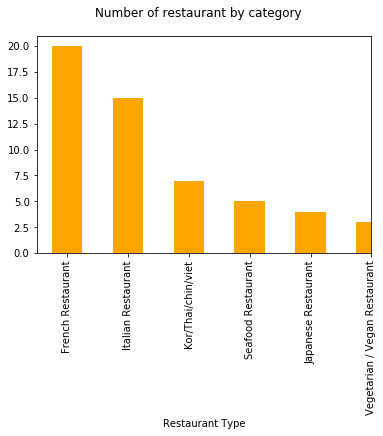

In [31]:
#Seeing the top 10 restaurants in each arrodismeent

z=paris_food.groupby(["Arrondisement"])

Z10=z.get_group('11th')

Z10_counts=Z10["Venue Category"].value_counts()
Z10_clus1=Z10_counts.sort_values(ascending=False)
Z10_counts.plot(kind='bar', color='orange')

plt.xlim(right=5)
plt.ylim(0)
plt.xlabel("Restaurant Type")
plt.suptitle('Number of restaurant by category')
plt.show()

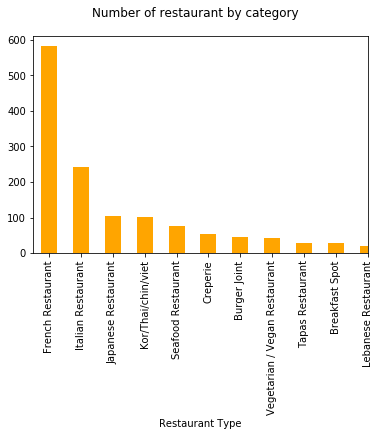

In [32]:
from matplotlib import pyplot as plt

paris_count=paris_food["Venue Category"].value_counts()
chart1=paris_count.sort_values(ascending=False)
chart1.plot(kind='bar', color='orange')

plt.xlim(right=10)
plt.ylim(0)
plt.xlabel("Restaurant Type")
plt.suptitle('Number of restaurant by category')
plt.show()

In [33]:
# one hot encoding
paris_onehot = pd.get_dummies(paris_food[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Arrondisement'] = paris_food['Arrondisement'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot.head()

Arrondisement  African Restaurant  American Restaurant  Arepa Restaurant  \
0           1st                   0                    0                 0   
2           1st                   0                    0                 0   
3           1st                   0                    0                 0   
4           1st                   0                    0                 0   
5           1st                   0                    0                 0   

   Argentinian Restaurant  Auvergne Restaurant  BBQ Joint  Bagel Shop  \
0                       0                    0          0           0   
2                       0                    0          0           0   
3                       0                    0          0           0   
4                       0                    0          0           0   
5                       0                    0          0           0   

   Basque Restaurant  Brazilian Restaurant  ...  \
0                  0                     0  ...   
2                  0                     0  ...   
3                  0                     0  ...   
4                  0                     0  ...   
5                  0                     0  ...   

   Southwestern French Restaurant  Souvlaki Shop  Steakhouse  \
0                               0              0           0   
2                               0              0           0   
3                               0              0           0   
4                               0              0           0   
5                               0              0           0   

   Szechuan Restaurant  Taco Place  Tapas Restaurant  Trattoria/Osteria  \
0                    0           0                 0                  0   
2                    0           0                 0                  0   
3                    0           0                 0                  0   
4                    0           0                 0                  0   
5                    0           0                 0                  0   

   Turkish Restaurant  Udon Restaurant  Vegetarian / Vegan Restaurant  
0                   0                0                              0  
2                   0                0                              0  
3                   0                1                              0  
4                   0                1                              0  
5                   0                0                              0  

[5 rows x 59 columns]

In [34]:
paris_grouped = paris_onehot.groupby('Arrondisement').mean().reset_index()


In [35]:
import numpy as np

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues



columns = ['Arrondisement']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

        
# create a new dataframe
arr_venues_sorted = pd.DataFrame(columns=columns)
arr_venues_sorted['Arrondisement'] = paris_grouped['Arrondisement']

for ind in np.arange(paris_grouped.shape[0]):
    arr_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

arr_venues_sorted

Arrondisement 1st Most Common Venue 2nd Most Common Venue  \
0           10th     French Restaurant    Italian Restaurant   
1           11th     French Restaurant    Italian Restaurant   
2           12th     French Restaurant    Kor/Thai/chin/viet   
3           13th     French Restaurant    Italian Restaurant   
4           14th     French Restaurant    Italian Restaurant   
5           15th     French Restaurant    Italian Restaurant   
6           16th     French Restaurant    Italian Restaurant   
7           17th     French Restaurant    Italian Restaurant   
8           18th     French Restaurant    Italian Restaurant   
9           19th     French Restaurant    Italian Restaurant   
10           1st     French Restaurant    Italian Restaurant   
11          20th     French Restaurant    Italian Restaurant   
12           2nd     French Restaurant    Italian Restaurant   
13           3rd     French Restaurant    Italian Restaurant   
14           4th     French Restaurant    Italian Restaurant   
15           5th     French Restaurant    Italian Restaurant   
16           6th     French Restaurant    Italian Restaurant   
17           7th     French Restaurant    Italian Restaurant   
18           8th     French Restaurant    Italian Restaurant   
19           9th     French Restaurant    Italian Restaurant   

   3rd Most Common Venue          4th Most Common Venue 5th Most Common Venue  \
0     Kor/Thai/chin/viet  Vegetarian / Vegan Restaurant    Seafood Restaurant   
1     Kor/Thai/chin/viet             Seafood Restaurant   Japanese Restaurant   
2     Italian Restaurant               Tapas Restaurant   Japanese Restaurant   
3     Kor/Thai/chin/viet                       Creperie      Tapas Restaurant   
4     Kor/Thai/chin/viet            Japanese Restaurant   Lebanese Restaurant   
5    Japanese Restaurant                   Burger Joint    Kor/Thai/chin/viet   
6    Japanese Restaurant             Seafood Restaurant          Burger Joint   
7     Seafood Restaurant            Japanese Restaurant              Creperie   
8     Kor/Thai/chin/viet            Japanese Restaurant    Seafood Restaurant   
9     Kor/Thai/chin/viet  Vegetarian / Vegan Restaurant        Breakfast Spot   
10   Japanese Restaurant             Seafood Restaurant              Creperie   
11    Kor/Thai/chin/viet  Vegetarian / Vegan Restaurant   Japanese Restaurant   
12    Seafood Restaurant            Japanese Restaurant    Kor/Thai/chin/viet   
13    Kor/Thai/chin/viet            Japanese Restaurant          Burger Joint   
14   Japanese Restaurant             Kor/Thai/chin/viet    Seafood Restaurant   
15              Creperie            Japanese Restaurant          Burger Joint   
16   Japanese Restaurant                       Creperie    Seafood Restaurant   
17   Japanese Restaurant             Seafood Restaurant    Kor/Thai/chin/viet   
18   Japanese Restaurant             Kor/Thai/chin/viet          Burger Joint   
19   Japanese Restaurant             Kor/Thai/chin/viet    Seafood Restaurant   

            6th Most Common Venue          7th Most Common Venue  \
0             Japanese Restaurant                 Breakfast Spot   
1                        Creperie  Vegetarian / Vegan Restaurant   
2   Vegetarian / Vegan Restaurant                     Bagel Shop   
3             Japanese Restaurant                   Burger Joint   
4                        Creperie                   Burger Joint   
5             Lebanese Restaurant                     Steakhouse   
6              Kor/Thai/chin/viet            Moroccan Restaurant   
7              Kor/Thai/chin/viet                      Gastropub   
8   Vegetarian / Vegan Restaurant                 Breakfast Spot   
9             Japanese Restaurant                   Burger Joint   
10  Vegetarian / Vegan Restaurant                   Burger Joint   
11               Tapas Restaurant             Seafood Restaurant   
12  Vegetarian / Vegan Restaurant            Lebanese Restaurant   
13  

## Clustering the data using Kmeans algorithm

In [37]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 4

#drop column n 
paris_grouped_clustering = paris_grouped.drop('Arrondisement', 1)


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

In [38]:
# add clustering labels
arr_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

paris_merged = paris_food

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
paris_merged = paris_merged.join(arr_venues_sorted.set_index('Arrondisement'), on='Arrondisement')

paris_merged.head() # check the last columns!

Arrondisement  Neighborhood Latitude  Neighborhood Longitude  \
0           1st              48.861147                2.338028   
2           1st              48.861147                2.338028   
3           1st              48.861147                2.338028   
4           1st              48.861147                2.338028   
5           1st              48.861147                2.338028   

               Venue  Venue Latitude  Venue Longitude      Venue Category  \
0             LouLou       48.862804         2.333500  Italian Restaurant   
2          Ellsworth       48.865528         2.337057   French Restaurant   
3           Sanukiya       48.864713         2.333805     Udon Restaurant   
4         Kunitoraya       48.865973         2.336880     Udon Restaurant   
5  Les Fines Gueules       48.865172         2.340645   French Restaurant   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0               3     French Restaurant    Italian Restaurant   
2               3     French Restaurant    Italian Restaurant   
3               3     French Restaurant    Italian Restaurant   
4               3     French Restaurant    Italian Restaurant   
5               3     French Restaurant    Italian Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0   Japanese Restaurant    Seafood Restaurant              Creperie   
2   Japanese Restaurant    Seafood Restaurant              Creperie   
3   Japanese Restaurant    Seafood Restaurant              Creperie   
4   Japanese Restaurant    Seafood Restaurant              Creperie   
5   Japanese Restaurant    Seafood Restaurant              Creperie   

           6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0  Vegetarian / Vegan Restaurant          Burger Joint       Udon Restaurant   
2  Vegetarian / Vegan Restaurant          Burger Joint       Udon Restaurant   
3  Vegetarian / Vegan Restaurant          Burger Joint       Udon Restaurant   
4  Vegetarian / Vegan Restaurant          Burger Joint       Udon Restaurant   
5  Vegetarian / Vegan Restaurant          Burger Joint       Udon Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0    Kor/Thai/chin/viet    Lebanese Restaurant  
2    Kor/Thai/chin/viet    Lebanese Restaurant  
3    Kor/Thai/chin/viet    Lebanese Restaurant  
4    Kor/Thai/chin/viet    Lebanese Restaurant  
5    Kor/Thai/chin/viet    Lebanese Restaurant

In [39]:
clus1=paris_merged.loc[paris_merged['Cluster Labels'] == 0, paris_merged.columns[[1] + list(range(1, paris_merged.shape[1]))]]
clus2=paris_merged.loc[paris_merged['Cluster Labels'] == 1, paris_merged.columns[[1] + list(range(1, paris_merged.shape[1]))]]
clus3=paris_merged.loc[paris_merged['Cluster Labels'] == 2, paris_merged.columns[[1] + list(range(1, paris_merged.shape[1]))]]
clus4=paris_merged.loc[paris_merged['Cluster Labels'] == 3, paris_merged.columns[[1] + list(range(1, paris_merged.shape[1]))]]

### Plotting the clusters

In [40]:
clus_map = folium.Map(location=[48.8566, 2.3522],zoom_start=12.2)

for lat, lng, Venuename in zip(clus1['Venue Latitude'], clus1['Venue Longitude'], clus1["Venue"]):
    label = '{}, {}'.format(arr,Venuename)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=1,
        popup=label,
        color='Blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(clus_map)  
    
    
for lat, lng, Venuename in zip(clus2['Venue Latitude'], clus2['Venue Longitude'], clus2["Venue"]):
    label = '{}, {}'.format(arr,Venuename)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=1,
        popup=label,
        color='Red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(clus_map)  
    
    
for lat, lng, Venuename in zip(clus3['Venue Latitude'], clus3['Venue Longitude'], clus3["Venue"]):
    label = '{}, {}'.format(arr,Venuename)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=1,
        popup=label,
        color='Green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(clus_map)  
        
for lat, lng, Venuename in zip(clus4['Venue Latitude'], clus4['Venue Longitude'], clus4["Venue"]):
    label = '{}, {}'.format(arr,Venuename)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=1,
        popup=label,
        color='Magenta',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(clus_map)  
    
    
clus_map

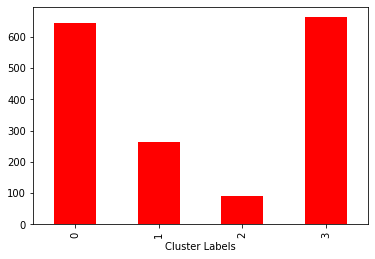

In [42]:
x=paris_merged.groupby(['Cluster Labels']).count()["Venue"].plot('bar', color='r')

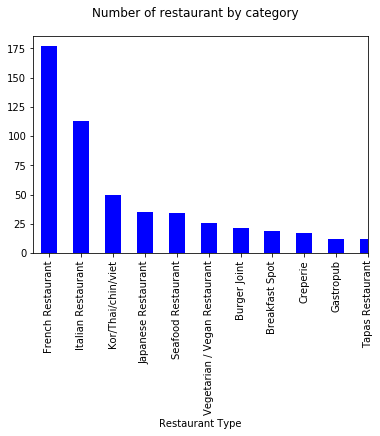

In [43]:
clus1_cat=clus1["Venue Category"].value_counts()
chart_clus1=clus1_cat.sort_values(ascending=False)
chart_clus1.plot(kind='bar', color='blue')

plt.xlim(right=10)
plt.ylim(0)
plt.xlabel("Restaurant Type")
plt.suptitle('Number of restaurant by category')
plt.show()

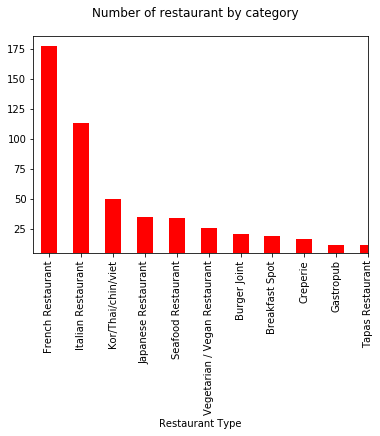

In [44]:
clus1_cat=clus1["Venue Category"].value_counts()
chart_clus1=clus1_cat.sort_values(ascending=False)
chart_clus1.plot(kind='bar', color='red')

plt.xlim(right=10)
plt.ylim(5)
plt.xlabel("Restaurant Type")
plt.suptitle('Number of restaurant by category')
plt.show()
